### Задание 1

Выберите один верный ответ. “Коэффициент корреляции между количеством сна и уровнем счастья равен нулю” - это...

* 1) Нулевая гипотеза
* 2) Альтернативная гипотеза


Ответ 1) Нулевая гипотеза

### Задание 2

Выберите один верный ответ. Если уровень значимости 0.10, а p-значение равно 0.7, то необходимо...

* 1)отвергнуть нулевую гипотезу
* 2)не отвергать нулевую гипотезу


Ответ 2) не отвергать нулевую гипотезу

### Задание 3

Выберите все подходящие ответы. Что из перечисленного является 
статистической гипотезой?

* 1)  Случайная величина X имеет 
     нормальное распределение
* 2)  Среднее арифметическое 
     признака A равно 52.5
* 3)  Средний вес упаковки яблок составляет 1300 г.
* 4)  Дисперсия случайной величины X 
     не больше 5

Ответ: \
все перечисленное, то есть: \
1) Случайная величина X имеет нормальное распределение; \
2) Среднее арифметическое признака A равно 52.5; \
3) Средний вес упаковки яблок составляет 1300 гр.; \
4) Дисперсия случайной величины X не больше 5.

### Задание 4

Парфюмерная компания хочет узнать возраст женщин, которые являются их покупательницами. Ранее уже было изучено, что средний возраст  был 37, а среднеквадратичное отклонение равно 3.4. Размер выборки - 200 человек. Рассчитайте 95% доверительный интервал для среднего возраста. Представьте все необходимые вычисления.

Формула доверительного интервала

$\mu \in \left ( \bar{X} - z_{крит}\times\frac{\sigma }{\sqrt{n}}; \bar{X} + z_{крит}\times\frac{\sigma }{\sqrt{n}} \right )$

In [1]:
# из условия задачи до конца не ясно, 3.4 - это истинное среднеквадратичное отклонение или выборочное.
# Предположим, что истинное, тогда воспользуемся нормальным распределением.
# В противном случае, нужно пользоваться распределением Стьюедента.

from scipy.stats import norm

# задаим известные параметры

n = 200     # размер выборки
mu = 37     # средний возраст
sigma = 3.4 # истинное среднеквадратичное отклонение
alfa = 0.05 # уровень значимости

z = -norm.ppf(alfa/2) # критическое значение

a = mu - z*sigma/n**0.5   # нижняя граница
b = mu + z*sigma/n**0.5   # верхняя граница

print('95% доверительный интервал для среднего возраста равен: ({0}, {1})'.format(round(a,2),round(b,2)))


95% доверительный интервал для среднего возраста равен: (36.53, 37.47)


### Задание 5

Перед Вами данные результатов экзаменов для детей средней школы.

In [2]:
import pandas as pd
df=pd.read_csv('examscore.csv')

In [3]:
df.sample(5)

,gender,race,parenteducation,lunch,testprepcourse,mathscore,readingscore,writingscore
300,female,group C,associate's degree,free/reduced,completed,50,64,68
590,male,group C,some high school,standard,completed,53,53,48
518,male,group C,some college,free/reduced,none,53,56,53
221,female,group D,bachelor's degree,standard,none,81,91,90
172,female,group E,bachelor's degree,free/reduced,none,48,52,56


Обработайте данные на предмет пропусков и проверьте гипотезу о том, что между средними оценками по математике для мальчиков и девочек нет статистических различий. Представьте все необходимые вычисления и содержательную интерпретацию.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gender           1000 non-null   object
 1   race             1000 non-null   object
 2   parenteducation  1000 non-null   object
 3   lunch            1000 non-null   object
 4   testprepcourse   1000 non-null   object
 5   mathscore        1000 non-null   int64 
 6   readingscore     1000 non-null   int64 
 7   writingscore     1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# проверим данные на предмет пропусков
df.isna().sum()

gender             0
race               0
parenteducation    0
lunch              0
testprepcourse     0
mathscore          0
readingscore       0
writingscore       0
dtype: int64

пропусков в датасете нет

In [6]:
df.gender.value_counts()

male      515
female    485
Name: gender, dtype: int64

Мусора в в принзнаке gender нет

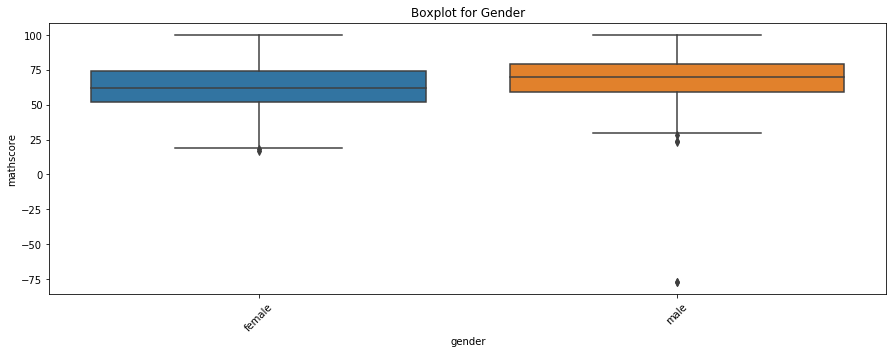

In [7]:
# построим боксплоты для оценок по математики для девочек и мальчиков

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

fig, ax = plt.subplots(figsize = (15, 5))

sns.boxplot(x='gender', y='mathscore',data=df,ax=ax)

plt.xticks(rotation=45)
ax.set_title('Boxplot for Gender')

plt.show()


В признаке mathscore имеется странные отрицательные значения. Посмотрим на них поближе.

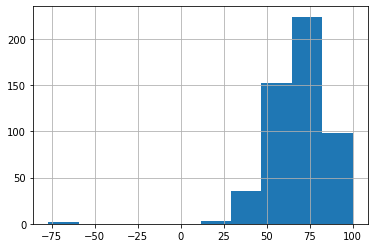

In [8]:
df[df.gender == 'male'].mathscore.hist()

In [9]:
df[df.mathscore < 0]

,gender,race,parenteducation,lunch,testprepcourse,mathscore,readingscore,writingscore
627,male,group C,bachelor's degree,standard,none,-77,66,69
794,male,group D,high school,standard,none,-77,72,70


Очевидно, оценка по математике не может быть меньше нуля. Можно предположить, что в двух записях допущены опечатки, и оценка на самом деле = 77, а не -77.
Исходя из этого допущения, выполним правки в датасете.

In [10]:
df.at[627,'mathscore'] = 77
df.at[794,'mathscore'] = 77

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025F25764408>]],
      dtype=object)

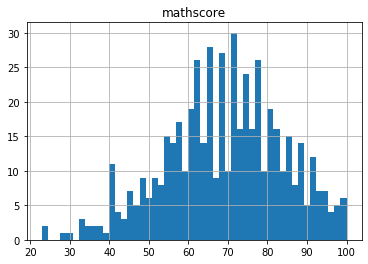

In [11]:
df.loc[df.gender == 'male',['mathscore']].hist(bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025F25A09748>]],
      dtype=object)

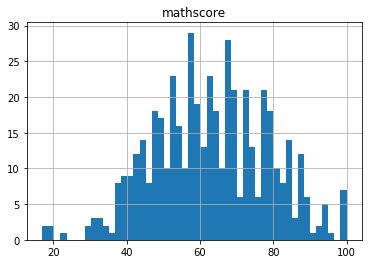

In [12]:
df.loc[df.gender == 'female',['mathscore']].hist(bins = 50)

Сформулируем статистическую гипотезу: \
пусть случайная величина X - оценка по математике мальчиков, а
случайная величина Y - оценка по математике девочек, тогда \
гипотеза $H_0$:
$\bar{X} = \bar{Y}$ , или: $\overline{X - Y} = 0$ \
альтернативная гипотеза $H_1$: 
$\overline{X - Y} \neq 0$  \
Для оценки гипотезы воспользуемся функцией ttest_ind для двух независимых случайнвх величин.

In [13]:
from scipy.stats import ttest_ind

ttest_ind(df.loc[df.gender == 'female',['mathscore']], df.loc[df.gender == 'male',['mathscore']]).pvalue[0]

2.4117264505137583e-10

pvalue пренебрежимо мало, поэтому нулевую гипотезу можно отвергнуть.\
То есть между оценками по математике для девочек и мальчиков есть статистические различия. То есть признак gender влияет на значение признака mathscore и его (gender) можно использовать в модели для оценки mathscore.

### Задание 6

Вам предложены данные A/B теста. Проанализируйте, есть ли статистически значимая разница для конверсии в контрольной и экспериментальной группе.

Данные содержат 5 признаков:
    
* user_id - ID пользователя
* timestamp - Временная отметка
* group - К какой группе относится пользователь (контрольная или экспериментальная)
* landing_page - Какой дизайн показали пользователю {old_page, new_page}
* converted - Конверсия (0=not converted, 1=converted)

Не забудьте проверить и подготовить данные, сделать всю необходимую предобработку.

In [14]:
dfab = pd.read_csv('ab_data.csv')

dfab.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [15]:
dfab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [16]:
dfab.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

Пропусков нет.

In [17]:
dfab.group.unique()

array(['control', 'treatment'], dtype=object)

In [18]:
dfab.converted.unique()

array([0, 1], dtype=int64)

Мусора в данных нет.

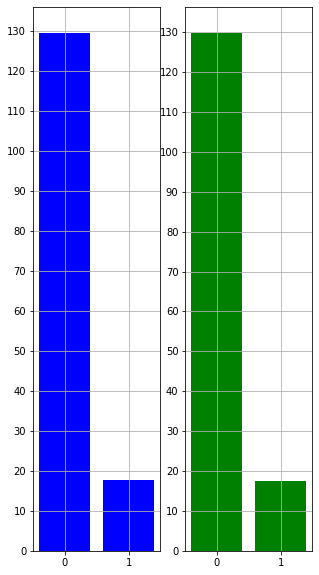

In [22]:
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (5,10))
x = dfab[dfab.group == 'control'].converted.value_counts().index
y = dfab[dfab.group == 'control'].converted.value_counts()/1000

x1 = dfab[dfab.group == 'treatment'].converted.value_counts().index
y1 = dfab[dfab.group == 'treatment'].converted.value_counts()/1000
yticks = np.arange(0,150,10)
ax1.set_xticks(x)
ax2.set_xticks(x1)

ax1.set_yticks(yticks)
ax2.set_yticks(yticks)

ax1.bar(x = x, height = y, color = 'blue')
ax2.bar(x = x1, height = y1, color = 'green')

ax1.grid(True)
ax2.grid(True)

Пусть случайная величина X - пропорция 1 в признаке converted для group = 'control', а \
случайная величина Y - пропорция 1 в признаке converted для group = 'treatment'. \
Пусть случайные величины X и Y нормальны и независимы.
Сформулируем гипотезу: \
нулевая гипотеза $H_0$ : пропорции X и Y равны; \
альтернативная гипотеза $H_1$ : пропорции X и Y не равны.

In [23]:
X = dfab[dfab.group == 'control'].converted
Y = dfab[dfab.group == 'treatment'].converted

px = round(X.value_counts()[1]/len(X),5) # пропорция конверсии для X
py = round(Y.value_counts()[1]/len(Y),5) # пропорция конверсии для Y

print('Пропорция для X, px = {0}, пропорция для Y, py = {1}'.format(px,py))

Пропорция для X, px = 0.1204, пропорция для Y, py = 0.11892


In [24]:
nx = len(X) # величина выборки X
ny = len(Y) # величина выборки Y

npx = X.value_counts()[1]
npy = Y.value_counts()[1]

pxy = (npx + npy)/(nx + ny)
pxy

0.11965919355605512

$\mathrm{z}_{\mathrm{st}}=\frac{\mathrm{p}_{1}-\mathrm{p}_{2}}{\sqrt{\mathrm{p}(1-\mathrm{p})} \sqrt{\frac{1}{\mathrm{n}_{1}}+\frac{1}{\mathrm{n}_{2}}}}$

In [25]:
z = (px - py)/((pxy*(1-pxy))**0.5*(1/nx+1/ny)**0.5) # z-крит
print('z-статистика = ', z)

z-статистика =  1.2372563204801654


In [26]:
(1-norm.cdf(z))*2 # p-value

0.21599193837920416

p-value больше чем уровень значимости 0.05

Нулевая гипотеза о разности пропорций не опровергнута с 5% уровнем значимости.
То есть, статистически значимая разница для конверсии в контрольной и экспериментальной группе отсутствует с 5% уровнем значимости.